## Dimitrios Georgilis - 300356614
## Vancouver Land Value Machine Learning Prediction
## References:
- Dataset: https://opendata.vancouver.ca/explore/dataset/property-tax-report/analyze/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InByb3BlcnR5LXRheC1yZXBvcnQiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImN1cnJlbnRfbGFuZF92YWx1ZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMjc5QjEifV0sInhBeGlzIjoibGVnYWxfdHlwZSIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIifV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9
- Zoning_district: https://vancouver.ca/files/cov/zoning-and-development-by-law-user-guide.pdf
- Blackboard-Lectures-demoCodes-Labs
- Python Documentation
- https://scikit-learn.org/

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

### Read The dataset

In [2]:
df = pd.read_csv("Dataset\property-tax-report.csv", sep=";")
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR
0,008-144-311,LAND,721199700000,72119970,RS-1,One-Family Dwelling,8,VAP1220,202,NaN,...,1808000.0,88300.0,2022.0,1598000.0,76900.0,1974.0,1974.0,6919.60,16,2022
1,010-830-316,LAND,723197350000,72319735,RS-1,One-Family Dwelling,12,VAP2558,10,391,...,1771000.0,156000.0,2022.0,1597000.0,137000.0,1912.0,1980.0,7028.28,16,2022
2,013-845-632,LAND,190758120000,19075812,RT-2,Two-Family Dwelling,27,VAP2324,5,647,...,1189000.0,314000.0,2022.0,1118000.0,283000.0,2005.0,2005.0,5796.46,16,2022
3,006-703-836,LAND,212735430000,21273543,RS-1,One-Family Dwelling,28,VAP1369,4,NaN,...,1511000.0,86700.0,2022.0,1292000.0,76100.0,1965.0,1970.0,6090.50,16,2022
4,007-476-604,LAND,637025770000,63702577,RS-1,One-Family Dwelling,A,VAP16533,138,540,...,4715000.0,257000.0,2022.0,4201000.0,263000.0,1925.0,1986.0,21077.20,1,2022


In [4]:
df.count()

PID                           218148
LEGAL_TYPE                    218697
FOLIO                         218697
LAND_COORDINATE               218697
ZONING_DISTRICT               218691
ZONING_CLASSIFICATION         218691
LOT                           217179
PLAN                          218479
BLOCK                          88476
DISTRICT_LOT                  207921
FROM_CIVIC_NUMBER             110134
TO_CIVIC_NUMBER               218130
STREET_NAME                   218548
PROPERTY_POSTAL_CODE          216663
NARRATIVE_LEGAL_LINE1         218602
NARRATIVE_LEGAL_LINE2         218527
NARRATIVE_LEGAL_LINE3         155054
NARRATIVE_LEGAL_LINE4          75398
NARRATIVE_LEGAL_LINE5          69048
CURRENT_LAND_VALUE            216744
CURRENT_IMPROVEMENT_VALUE     216744
TAX_ASSESSMENT_YEAR           216744
PREVIOUS_LAND_VALUE           213503
PREVIOUS_IMPROVEMENT_VALUE    213503
YEAR_BUILT                    216474
BIG_IMPROVEMENT_YEAR          216474
TAX_LEVY                      216571
N

In [520]:
df.isnull().sum()

PID                              549
LEGAL_TYPE                         0
FOLIO                              0
LAND_COORDINATE                    0
ZONING_DISTRICT                    6
ZONING_CLASSIFICATION              6
LOT                             1518
PLAN                             218
BLOCK                         130221
DISTRICT_LOT                   10776
FROM_CIVIC_NUMBER             108563
TO_CIVIC_NUMBER                  567
STREET_NAME                      149
PROPERTY_POSTAL_CODE            2034
NARRATIVE_LEGAL_LINE1             95
NARRATIVE_LEGAL_LINE2            170
NARRATIVE_LEGAL_LINE3          63643
NARRATIVE_LEGAL_LINE4         143299
NARRATIVE_LEGAL_LINE5         149649
CURRENT_LAND_VALUE              1953
CURRENT_IMPROVEMENT_VALUE       1953
TAX_ASSESSMENT_YEAR             1953
PREVIOUS_LAND_VALUE             5194
PREVIOUS_IMPROVEMENT_VALUE      5194
YEAR_BUILT                      2223
BIG_IMPROVEMENT_YEAR            2223
TAX_LEVY                        2126
N

### Data Preperation

#### Drop unecessary columns

In [521]:
df.drop(columns = ["REPORT_YEAR", "TAX_ASSESSMENT_YEAR", "PID", "FOLIO", "LAND_COORDINATE" ], inplace = True)
df.drop(columns = ["NARRATIVE_LEGAL_LINE1", "NARRATIVE_LEGAL_LINE2", "NARRATIVE_LEGAL_LINE3", "NARRATIVE_LEGAL_LINE4","NARRATIVE_LEGAL_LINE5"], inplace = True)

#### Split the postal

In [522]:
df[['POSTAL','CODE']] = df['PROPERTY_POSTAL_CODE'].str.split(' ',expand = True)

In [523]:
df.drop(columns = ["CODE", "PROPERTY_POSTAL_CODE"], inplace = True)

In [524]:
df.head()

,LEGAL_TYPE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,FROM_CIVIC_NUMBER,TO_CIVIC_NUMBER,STREET_NAME,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,POSTAL
0,LAND,RS-1,One-Family Dwelling,8,VAP1220,202,NaN,NaN,628.0,29TH AVE E,1808000.0,88300.0,1598000.0,76900.0,1974.0,1974.0,6919.60,16,V5V
1,LAND,RS-1,One-Family Dwelling,12,VAP2558,10,391,NaN,435.0,30TH AVE E,1771000.0,156000.0,1597000.0,137000.0,1912.0,1980.0,7028.28,16,V5V
2,LAND,RT-2,Two-Family Dwelling,27,VAP2324,5,647,NaN,6112.0,MAIN ST,1189000.0,314000.0,1118000.0,283000.0,2005.0,2005.0,5796.46,16,V5W
3,LAND,RS-1,One-Family Dwelling,28,VAP1369,4,NaN,NaN,5249.0,PRINCE ALBERT ST,1511000.0,86700.0,1292000.0,76100.0,1965.0,1970.0,6090.50,16,V5W
4,LAND,RS-1,One-Family Dwelling,A,VAP16533,138,540,NaN,4411.0,3RD AVE W,4715000.0,257000.0,4201000.0,263000.0,1925.0,1986.0,21077.20,1,V6R


#### Street Feature

Include only roads that have more than 100 plot/buildings

Create dummies

In [525]:
df.STREET_NAME.value_counts()

RICHARDS ST       3711
CAMBIE ST         3018
HOMER ST          2780
7TH AVE W         2690
SEYMOUR ST        2666
                  ... 
DUNKIRK ST           1
BURRARD INLET        1
CURATE WYND          1
STARBOARD SQ         1
SHOREPINE WALK       1
Name: STREET_NAME, Length: 982, dtype: int64

In [526]:
other_classes = df['STREET_NAME'].value_counts()[df['STREET_NAME'].value_counts() < 100].index

df['STREET_NAME'][df['STREET_NAME'].isin(other_classes)] = 'OTHER'

C:\Users\dimit\AppData\Local\Temp/ipykernel_4576/1416209023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STREET_NAME'][df['STREET_NAME'].isin(other_classes)] = 'OTHER'


In [527]:
df.STREET_NAME.value_counts()

OTHER           16174
RICHARDS ST      3711
CAMBIE ST        3018
HOMER ST         2780
7TH AVE W        2690
                ...  
CHAMBERS ST       103
MONMOUTH AVE      103
LORD ST           102
BERKELEY ST       101
69TH AVE W        101
Name: STREET_NAME, Length: 395, dtype: int64

In [528]:
df = df[df["STREET_NAME"].str.contains("OTHER") == False]

In [529]:
df.STREET_NAME.value_counts()

RICHARDS ST     3711
CAMBIE ST       3018
HOMER ST        2780
7TH AVE W       2690
SEYMOUR ST      2666
                ... 
CHAMBERS ST      103
MONMOUTH AVE     103
LORD ST          102
BERKELEY ST      101
69TH AVE W       101
Name: STREET_NAME, Length: 394, dtype: int64

In [530]:
dummy_features = pd.get_dummies(df.STREET_NAME,prefix = "STREET", drop_first=False)
dummy_features.drop(columns={'STREET_69TH AVE W'}, axis = 1, inplace = True)
df2 = pd.concat([df, dummy_features], axis = 1)
df2.drop(columns=["STREET_NAME"], axis = 1, inplace = True)

#### Zoning Feature

Keep only one, two, multi dwelling

Dummies

In [531]:
df2.ZONING_CLASSIFICATION.value_counts()

Comprehensive Development    75070
One-Family Dwelling          58668
Multiple Dwelling            28435
Commercial                   17921
Two-Family Dwelling          15178
Industrial                    4224
Historical Area               2433
Other                          336
Limited Agriculture            105
Name: ZONING_CLASSIFICATION, dtype: int64

In [532]:
dummy_features = pd.get_dummies(df2.ZONING_CLASSIFICATION,prefix = "zone", drop_first=True)
df3 = pd.concat([df2, dummy_features], axis = 1) #add dummies to the dataframe
df3

,LEGAL_TYPE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,FROM_CIVIC_NUMBER,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,...,STREET_YORK AVE,STREET_YUKON ST,zone_Comprehensive Development,zone_Historical Area,zone_Industrial,zone_Limited Agriculture,zone_Multiple Dwelling,zone_One-Family Dwelling,zone_Other,zone_Two-Family Dwelling
0,LAND,RS-1,One-Family Dwelling,8,VAP1220,202,NaN,NaN,628.0,1808000.0,...,0,0,0,0,0,0,0,1,0,0
1,LAND,RS-1,One-Family Dwelling,12,VAP2558,10,391,NaN,435.0,1771000.0,...,0,0,0,0,0,0,0,1,0,0
2,LAND,RT-2,Two-Family Dwelling,27,VAP2324,5,647,NaN,6112.0,1189000.0,...,0,0,0,0,0,0,0,0,0,1
3,LAND,RS-1,One-Family Dwelling,28,VAP1369,4,NaN,NaN,5249.0,1511000.0,...,0,0,0,0,0,0,0,1,0,0
4,LAND,RS-1,One-Family Dwelling,A,VAP16533,138,540,NaN,4411.0,4715000.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218692,STRATA,CD-1 (561),Comprehensive Development,232,EPS4557,NaN,181,805,983.0,345000.0,...,0,0,1,0,0,0,0,0,0,0
218693,STRATA,C-2B,Commercial,89,LMS1089,NaN,526,NaN,2207.0,2803000.0,...,0,0,0,0,0,0,0,0,0,0
218694,STRATA,DD,Comprehensive Development,83,VAS1182,NaN,541,510,1330.0,346000.0,...,0,0,1,0,0,0,0,0,0,0
218695,LAND,DD,Comprehensive Development,E,LMP38156,103,541,NaN,1221.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [533]:
df3.drop(columns={'zone_Comprehensive Development','zone_Historical Area','zone_Industrial','zone_Limited Agriculture','zone_Other','ZONING_CLASSIFICATION'}, axis = 1, inplace = True)

In [534]:
df3.head()

,LEGAL_TYPE,ZONING_DISTRICT,LOT,PLAN,BLOCK,DISTRICT_LOT,FROM_CIVIC_NUMBER,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,...,STREET_WILTSHIRE ST,STREET_WINDSOR ST,STREET_WOODLAND DR,STREET_WYLIE ST,STREET_YEW ST,STREET_YORK AVE,STREET_YUKON ST,zone_Multiple Dwelling,zone_One-Family Dwelling,zone_Two-Family Dwelling
0,LAND,RS-1,8,VAP1220,202,NaN,NaN,628.0,1808000.0,88300.0,...,0,0,0,0,0,0,0,0,1,0
1,LAND,RS-1,12,VAP2558,10,391,NaN,435.0,1771000.0,156000.0,...,0,0,0,0,0,0,0,0,1,0
2,LAND,RT-2,27,VAP2324,5,647,NaN,6112.0,1189000.0,314000.0,...,0,0,0,0,0,0,0,0,0,1
3,LAND,RS-1,28,VAP1369,4,NaN,NaN,5249.0,1511000.0,86700.0,...,0,0,0,0,0,0,0,0,1,0
4,LAND,RS-1,A,VAP16533,138,540,NaN,4411.0,4715000.0,257000.0,...,0,0,0,0,0,0,0,0,1,0


#### change all columns to lower-case for easier use

In [535]:
df3.columns = [x.lower() for x in df3.columns]
df3.head()

,legal_type,zoning_district,lot,plan,block,district_lot,from_civic_number,to_civic_number,current_land_value,current_improvement_value,...,street_wiltshire st,street_windsor st,street_woodland dr,street_wylie st,street_yew st,street_york ave,street_yukon st,zone_multiple dwelling,zone_one-family dwelling,zone_two-family dwelling
0,LAND,RS-1,8,VAP1220,202,NaN,NaN,628.0,1808000.0,88300.0,...,0,0,0,0,0,0,0,0,1,0
1,LAND,RS-1,12,VAP2558,10,391,NaN,435.0,1771000.0,156000.0,...,0,0,0,0,0,0,0,0,1,0
2,LAND,RT-2,27,VAP2324,5,647,NaN,6112.0,1189000.0,314000.0,...,0,0,0,0,0,0,0,0,0,1
3,LAND,RS-1,28,VAP1369,4,NaN,NaN,5249.0,1511000.0,86700.0,...,0,0,0,0,0,0,0,0,1,0
4,LAND,RS-1,A,VAP16533,138,540,NaN,4411.0,4715000.0,257000.0,...,0,0,0,0,0,0,0,0,1,0


#### Land Value Feature

Keep only records that have a current land value and had a previous land value

In [536]:
df3.isnull().sum()

legal_type                       0
zoning_district                  4
lot                           1222
plan                            97
block                       123467
                             ...  
street_york ave                  0
street_yukon st                  0
zone_multiple dwelling           0
zone_one-family dwelling         0
zone_two-family dwelling         0
Length: 413, dtype: int64

In [537]:
df3.dropna(subset=['current_land_value', 'previous_land_value'], how = 'any', inplace = True)

In [538]:
df3.drop(columns=["previous_land_value", "previous_improvement_value"], axis = 1, inplace = True)

In [539]:
df3.isnull().sum()

legal_type                       0
zoning_district                  2
lot                           1073
plan                            66
block                       119890
                             ...  
street_york ave                  0
street_yukon st                  0
zone_multiple dwelling           0
zone_one-family dwelling         0
zone_two-family dwelling         0
Length: 411, dtype: int64

#### Legal Feature

Keep STRATA and LAND 

Dummies

In [540]:
df3.legal_type.value_counts()

STRATA    119504
LAND       77745
OTHER         66
Name: legal_type, dtype: int64

In [541]:
df3.loc[df3.legal_type.str.contains('OTHER'), 'legal_type'] = float("nan")

In [542]:
df3.dropna(subset=['legal_type'], inplace = True)

In [543]:
dummy_features = pd.get_dummies(df3.legal_type,prefix = "legal", drop_first=True)
df4 = pd.concat([df3, dummy_features], axis = 1)
df4.drop(columns=["legal_type"], axis = 1, inplace = True)

In [544]:
df4.isnull().sum()

zoning_district                  0
lot                           1030
plan                             0
block                       119848
district_lot                  8804
                             ...  
street_yukon st                  0
zone_multiple dwelling           0
zone_one-family dwelling         0
zone_two-family dwelling         0
legal_STRATA                     0
Length: 411, dtype: int64

In [545]:
df4.legal_STRATA.value_counts()

1    119504
0     77745
Name: legal_STRATA, dtype: int64

In [546]:
# change all columns to lower-case
df4.columns = [x.lower() for x in df4.columns]
df4.head()

,zoning_district,lot,plan,block,district_lot,from_civic_number,to_civic_number,current_land_value,current_improvement_value,year_built,...,street_windsor st,street_woodland dr,street_wylie st,street_yew st,street_york ave,street_yukon st,zone_multiple dwelling,zone_one-family dwelling,zone_two-family dwelling,legal_strata
0,RS-1,8,VAP1220,202,NaN,NaN,628.0,1808000.0,88300.0,1974.0,...,0,0,0,0,0,0,0,1,0,0
1,RS-1,12,VAP2558,10,391,NaN,435.0,1771000.0,156000.0,1912.0,...,0,0,0,0,0,0,0,1,0,0
2,RT-2,27,VAP2324,5,647,NaN,6112.0,1189000.0,314000.0,2005.0,...,0,0,0,0,0,0,0,0,1,0
3,RS-1,28,VAP1369,4,NaN,NaN,5249.0,1511000.0,86700.0,1965.0,...,0,0,0,0,0,0,0,1,0,0
4,RS-1,A,VAP16533,138,540,NaN,4411.0,4715000.0,257000.0,1925.0,...,0,0,0,0,0,0,0,1,0,0


In [547]:
df4.legal_strata.value_counts()

1    119504
0     77745
Name: legal_strata, dtype: int64

In [548]:
df4.drop(columns=["plan", "lot", "block", "district_lot", "from_civic_number", "to_civic_number", "current_improvement_value","tax_levy", "neighbourhood_code"], axis = 1, inplace = True)

In [549]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197249 entries, 0 to 218696
Columns: 402 entries, zoning_district to legal_strata
dtypes: float64(3), object(2), uint8(397)
memory usage: 83.7+ MB


#### Postal Feature

After splited make dummies

In [550]:
df4.postal.value_counts()

V6B    18625
V6Z    14220
V5R    11224
V6K     9047
V5Z     8918
V5T     8746
V5N     8725
V6E     8569
V6P     8302
V6J     8102
V5Y     7543
V5X     7233
V5V     6563
V5P     6349
V6A     5776
V5K     5680
V6R     5634
V5S     5536
V6G     5240
V5L     5052
V6H     5011
V6M     4942
V5W     4761
V5M     4701
V6N     3698
V6S     2875
V6L     2847
V6C     2007
V6T       68
Z          7
V7X        2
V7Y        1
Name: postal, dtype: int64

In [551]:
dummy_features = pd.get_dummies(df4.postal,prefix = "ZIP", drop_first=True)
df5 = pd.concat([df4, dummy_features], axis = 1)
df5.drop(columns=["postal"], axis = 1, inplace = True)

In [552]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197249 entries, 0 to 218696
Columns: 432 entries, zoning_district to ZIP_Z
dtypes: float64(3), object(1), uint8(428)
memory usage: 88.0+ MB


#### Zoning District Feature

Group by codes and then create dummies

In [553]:
df5.dropna(subset=['zoning_district'], inplace = True) 

In [554]:
df5.loc[df5.zoning_district.str.contains('CD-1*'), 'zoning_district'] = 'CD-1'
df5.loc[df5.zoning_district.str.contains('RS*'), 'zoning_district'] = 'RS'
df5.loc[df5.zoning_district.str.contains('C-.'), 'zoning_district'] = 'C'
df5.loc[df5.zoning_district.str.contains('M-.'), 'zoning_district'] = 'M'
df5.loc[df5.zoning_district.str.contains('I-.'), 'zoning_district'] = 'I'
df5.loc[df5.zoning_district.str.contains('HA-.'), 'zoning_district'] = 'HA'

In [555]:
df5.zoning_district.value_counts()

RS       98598
CD-1     54638
C        19677
DD       15417
M         2495
HA        2407
I         1533
FCCDD     1320
DEOD       438
BCPED      387
FSHCA      334
CWD          5
Name: zoning_district, dtype: int64

In [556]:
dummy_features = pd.get_dummies(df5.zoning_district,prefix = "zone", drop_first=True)
df6 = pd.concat([df5, dummy_features], axis = 1)
df6.drop(columns=["zoning_district"], axis = 1, inplace = True)

In [557]:
df6.head()

,current_land_value,year_built,big_improvement_year,street_10th ave e,street_10th ave w,street_11th ave e,street_11th ave w,street_12th ave e,street_12th ave w,street_13th ave e,...,zone_CD-1,zone_CWD,zone_DD,zone_DEOD,zone_FCCDD,zone_FSHCA,zone_HA,zone_I,zone_M,zone_RS
0,1808000.0,1974.0,1974.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1771000.0,1912.0,1980.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1189000.0,2005.0,2005.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1511000.0,1965.0,1970.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4715000.0,1925.0,1986.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [558]:
df6.rename(columns = {'zone_multiple dwelling':'multiple dwelling'},inplace = True)
df6.rename(columns = {'zone_one-family dwelling':'one-family dwelling'},inplace = True)
df6.rename(columns = {'zone_two-family dwelling':'two-family dwelling'},inplace = True)
df6.rename(columns = {'current_land_value':'price'},inplace = True)
df6.head()

,price,year_built,big_improvement_year,street_10th ave e,street_10th ave w,street_11th ave e,street_11th ave w,street_12th ave e,street_12th ave w,street_13th ave e,...,zone_CD-1,zone_CWD,zone_DD,zone_DEOD,zone_FCCDD,zone_FSHCA,zone_HA,zone_I,zone_M,zone_RS
0,1808000.0,1974.0,1974.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1771000.0,1912.0,1980.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1189000.0,2005.0,2005.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1511000.0,1965.0,1970.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4715000.0,1925.0,1986.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [559]:
df6.isnull().sum()

price                     0
year_built              849
big_improvement_year    849
street_10th ave e         0
street_10th ave w         0
                       ... 
zone_FSHCA                0
zone_HA                   0
zone_I                    0
zone_M                    0
zone_RS                   0
Length: 442, dtype: int64

In [560]:
df6.dropna(subset=['year_built', 'big_improvement_year'], how = 'all', inplace = True)

In [561]:
df6.isnull().sum().sum()

0

### Log Transformation

Dummy features are not to be transformed

In [562]:
df7 = df6[['price', 'year_built', 'big_improvement_year']].copy()

In [563]:
log = np.log1p(df7)

In [564]:
log.head()

,price,year_built,big_improvement_year
0,14.407732,7.588324,7.588324
1,14.387055,7.556428,7.591357
2,13.988624,7.603898,7.603898
3,14.228283,7.583756,7.586296
4,15.366260,7.563201,7.594381


In [565]:
df6.drop(columns=['price', 'year_built', 'big_improvement_year'], axis = 1, inplace = True)

In [566]:
log_df = pd.concat([log, df6], axis = 1)

In [567]:
log_df.head()

,price,year_built,big_improvement_year,street_10th ave e,street_10th ave w,street_11th ave e,street_11th ave w,street_12th ave e,street_12th ave w,street_13th ave e,...,zone_CD-1,zone_CWD,zone_DD,zone_DEOD,zone_FCCDD,zone_FSHCA,zone_HA,zone_I,zone_M,zone_RS
0,14.407732,7.588324,7.588324,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14.387055,7.556428,7.591357,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.988624,7.603898,7.603898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14.228283,7.583756,7.586296,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15.366260,7.563201,7.594381,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Univariate Analysis

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

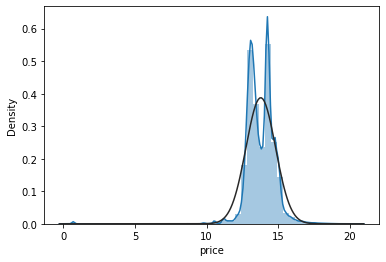

In [568]:
sns.distplot(log_df.price, fit = norm)

We need to remove the outliers under 10 and over 17

In [569]:
log_df.drop(log_df.loc[log_df['price']<10].index, inplace=True)
log_df.drop(log_df.loc[log_df['price']>17].index, inplace=True)

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

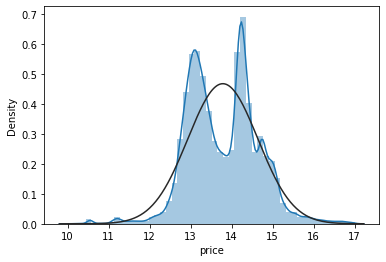

In [570]:
sns.distplot(log_df.price, fit = norm)

The price kind of follows a normal distribution

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_built', ylabel='Density'>

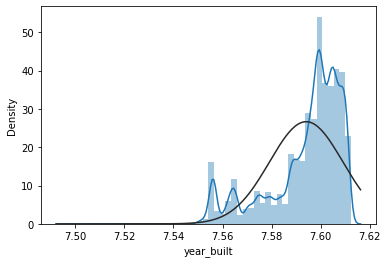

In [571]:
sns.distplot(log_df.year_built, fit = norm)

We need to remove the outliers under 7.54

In [572]:
log_df.drop(log_df.loc[log_df['year_built']<7.54].index, inplace=True)

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year_built', ylabel='Density'>

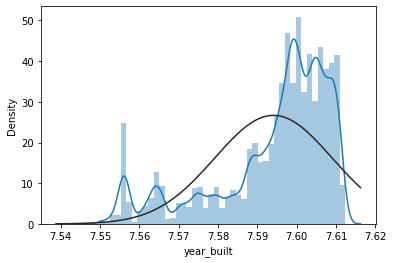

In [573]:
sns.distplot(log_df.year_built, fit = norm)

Although the year_built does not follow a normal distribution the records have more lots/buildings that are newer

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='big_improvement_year', ylabel='Density'>

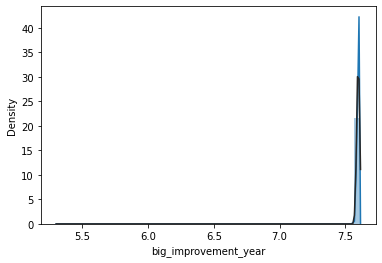

In [574]:
sns.distplot(log_df.big_improvement_year, fit = norm)

We need to remove the outliers under 7.56

In [575]:
log_df.drop(log_df.loc[log_df['big_improvement_year']<7.56].index, inplace=True)

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='big_improvement_year', ylabel='Density'>

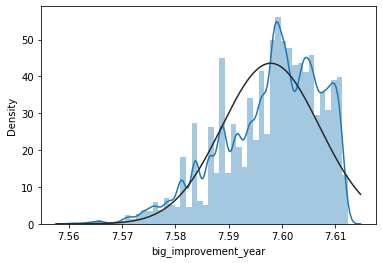

In [576]:
sns.distplot(log_df.big_improvement_year, fit = norm)

Although the big_improvemnt does not follow a normal distribution the records have more lots/buildings that are newer. Maybe if we had data of the last one and a half year it could follow a normal distribution. (The data is of January 2020)

In [577]:
len(log_df.index)

194745

### Multivariate Analysis

<AxesSubplot:xlabel='year_built', ylabel='price'>

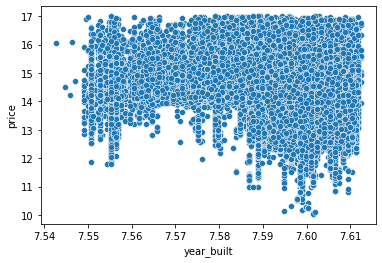

In [578]:
sns.scatterplot(data = log_df, x = "year_built", y = "price")

<AxesSubplot:xlabel='big_improvement_year', ylabel='price'>

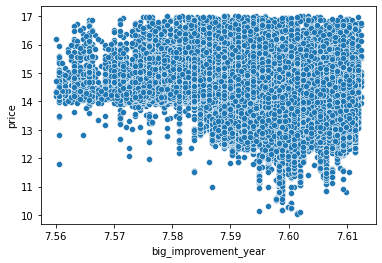

In [579]:
sns.scatterplot(data = log_df, x = "big_improvement_year", y = "price")

From the two scatterplots we cannot see any clear relationship. 

- From both of them we can understand that the newer the record
  the higher the density of the dataset.

- There are not many cheap old records

### Save prepared dataset

In [580]:
log_df.to_csv('Dataset\property-tax-report-prepared.csv', index = False)

### Feature Selection

In [581]:
X = log_df.drop('price', axis=1) 
y = log_df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Pipeline (67 mins)

- 7 different models 
- Two scalers used (results of the MinMaxScaler in report)
- The if in the end provides the best_model from R^2.
- Random Forest Selection is used after the bad results of variance threshold.

In [582]:
names = [
    "linear regression", "SGD regressor", "Decision Tree Regressor", "Gradient boosting regressor", 
    "Random forest regressor", "Ada boost regressor", "XGBoost regressor"
]
r2 = []
rmse = []
regressors = [
    LinearRegression(), SGDRegressor(max_iter=1000, tol=1e-3), DecisionTreeRegressor(max_depth=3), GradientBoostingRegressor(),
    RandomForestRegressor(n_estimators=100, max_depth=3), AdaBoostRegressor(n_estimators=100), XGBRegressor(n_estimators=100), 
]

best_score = 0

for rgb in regressors:
    
    pipe = Pipeline([('sfm', SelectFromModel(estimator=RandomForestRegressor())),
                         ('scaler', RobustScaler()),
                         ('regressor', rgb)], verbose = True)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    i = pipe.score(X_test, y_test)
    r2.append(pipe.score(X_test, y_test))
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))
    if i > best_score:
        best_score = i
        best_model = pipe

[Pipeline] ............... (step 1 of 3) Processing sfm, total= 9.4min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   0.1s
[Pipeline] ............... (step 1 of 3) Processing sfm, total= 8.7min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   0.3s
[Pipeline] ............... (step 1 of 3) Processing sfm, total= 8.3min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   0.1s
[Pipeline] ............... (step 1 of 3) Processing sfm, total= 8.5min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   9.0s
[Pipeline] ............... (step 1 of 3) Processing sfm, total= 8.8min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipel

In [583]:
res_df = pd.DataFrame(zip(names, r2, rmse), columns=['Regressors', 'R2 score', "RMSE"])

In [584]:
res_df

,Regressors,R2 score,RMSE
0,linear regression,0.675349,0.487203
1,SGD regressor,0.671002,0.490454
2,Decision Tree Regressor,0.617775,0.528641
3,Gradient boosting regressor,0.733838,0.441138
4,Random forest regressor,0.617799,0.528625
5,Ada boost regressor,0.588515,0.548502
6,XGBoost regressor,0.820556,0.362215


In [585]:
res_df.sort_values(by=['R2 score', 'RMSE'], ascending=[False, True]).head(1)

,Regressors,R2 score,RMSE
6,XGBoost regressor,0.820556,0.362215


In [586]:
best_model

Pipeline(steps=[('sfm', SelectFromModel(estimator=RandomForestRegressor())),
                ('scaler', RobustScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=16, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parame

In [587]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

[Pipeline] ............... (step 1 of 3) Processing sfm, total= 9.5min
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   2.1s


<AxesSubplot:xlabel='price'>

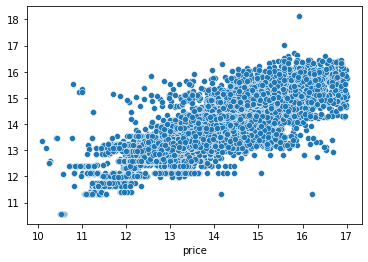

In [588]:
sns.scatterplot(x = y_test, y = y_pred)

### 9. Out of Sample Prediction

5% of the records of the dataset is arround 9000

In [589]:
df_random = log_df.sample(n=9000)
df_random

,price,year_built,big_improvement_year,street_10th ave e,street_10th ave w,street_11th ave e,street_11th ave w,street_12th ave e,street_12th ave w,street_13th ave e,...,zone_CD-1,zone_CWD,zone_DD,zone_DEOD,zone_FCCDD,zone_FSHCA,zone_HA,zone_I,zone_M,zone_RS
208975,13.340697,7.608374,7.608374,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
47676,14.354924,7.589842,7.589842,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60464,14.192577,7.590852,7.593878,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28982,14.312643,7.577634,7.577634,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113275,12.896719,7.606885,7.606885,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112803,14.380825,7.610853,7.611348,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54593,14.731802,7.607381,7.607878,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118183,12.926351,7.600902,7.600902,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
75644,12.777055,7.591357,7.591862,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [590]:
feat_random = df_random.drop(columns = ["price"])
target_random = df_random.filter(["price"])

In [591]:
X_train, X_test, y_train, y_test = train_test_split(feat_random, target_random, test_size=0.3, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


[Pipeline] ............... (step 1 of 3) Processing sfm, total=  15.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing regressor, total=   0.2s


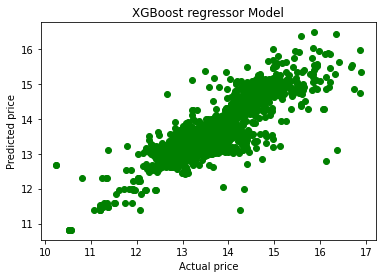

In [592]:
plt.scatter(y_test, y_pred, alpha = 1, color = 'g')
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("XGBoost regressor Model")
plt.show()